## Read data (Complete dataset)

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNetCV
from sklearn.feature_selection import RFE
from keras.models import Sequential
from keras.layers import Bidirectional, LSTM, Dropout, Dense
import joblib
from joblib import Parallel, delayed
from scipy import stats
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder, RobustScaler, StandardScaler

In [2]:
raw_df = pd.read_csv('C:\\Users\\ldmag\\Documents\\GitHub\\Code-Assignments-Projects\\Projects\\Ironhacks_Unemployment\\data\\complete_ingest.csv')

In [3]:
raw_df.isnull().sum() / len(raw_df) * 100

uu_id                     0.000000
timeperiod                0.000000
week_number               0.000000
countyfips                0.000000
tract                     0.000000
tract_name                0.000000
total_claims              0.000000
edu_8th_or_less           0.000000
edu_grades_9_11           0.000000
edu_hs_grad_equiv         0.000000
edu_post_hs               0.000000
edu_unknown               0.000000
top_category_employer1    0.000000
top_category_employer2    0.056714
top_category_employer3    0.317137
gender_female             0.000000
gender_male               0.000000
gender_na                 0.000000
race_amerindian           0.000000
race_asian                0.000000
race_black                0.000000
race_noanswer             0.000000
race_hawaiiannative       0.000000
race_other                0.000000
race_white                0.000000
average_wage              0.000000
dtype: float64

In [4]:
new_dates = pd.to_datetime(raw_df['timeperiod'].astype(str), format='%Y%m%d')
new_dates.head(3)

0   2022-04-23
1   2022-03-05
2   2022-02-19
Name: timeperiod, dtype: datetime64[ns]

In [5]:
raw_df['date'] = new_dates
raw_df.drop(['timeperiod'], axis=1, inplace=True)

raw_df.columns

Index(['uu_id', 'week_number', 'countyfips', 'tract', 'tract_name',
       'total_claims', 'edu_8th_or_less', 'edu_grades_9_11',
       'edu_hs_grad_equiv', 'edu_post_hs', 'edu_unknown',
       'top_category_employer1', 'top_category_employer2',
       'top_category_employer3', 'gender_female', 'gender_male', 'gender_na',
       'race_amerindian', 'race_asian', 'race_black', 'race_noanswer',
       'race_hawaiiannative', 'race_other', 'race_white', 'average_wage',
       'date'],
      dtype='object')

In [6]:
raw_df.head(5)

uu_id  week_number  countyfips  tract  \
0  e201385d37b5f6eea30f6d6d4106dc6f           17       18003    800   
1  e201385d37b5f6eea30f6d6d4106dc6f           10       18003    800   
2  e201385d37b5f6eea30f6d6d4106dc6f            8       18003    800   
3  e201385d37b5f6eea30f6d6d4106dc6f           27       18003    800   
4  e201385d37b5f6eea30f6d6d4106dc6f           12       18003    800   

                              tract_name  total_claims  edu_8th_or_less  \
0  Census Tract 8, Allen County, Indiana            12                0   
1  Census Tract 8, Allen County, Indiana            14                0   
2  Census Tract 8, Allen County, Indiana            20                0   
3  Census Tract 8, Allen County, Indiana            12                0   
4  Census Tract 8, Allen County, Indiana            10                0   

   edu_grades_9_11  edu_hs_grad_equiv  edu_post_hs  ...  gender_na  \
0                0                  0            0  ...          0   
1                0                  0            0  ...          0   
2                0                 14            0  ...          0   
3                0                  0            0  ...          0   
4                0                  0            0  ...          0   

  race_amerindian race_asian race_black  race_noanswer  race_hawaiiannative  \
0               0          0          0              0                    0   
1               0          0          0              0                    0   
2               0          0          0              0                    0   
3               0          0          0              0                    0   
4               0          0          0              0                    0   

   race_other  race_white  average_wage       date  
0           0           0        8558.0 2022-04-23  
1           0           0        8558.0 2022-03-05  
2          12           0        8558.0 2022-02-19  
3           0           0        8558.0 2022-07-02  
4           0           0        8558.0 2022-03-19  

[5 rows x 26 columns]

In [7]:
raw_df.dropna(axis=0, inplace=True)
raw_df.isnull().sum() / len(raw_df) * 100

uu_id                     0.0
week_number               0.0
countyfips                0.0
tract                     0.0
tract_name                0.0
total_claims              0.0
edu_8th_or_less           0.0
edu_grades_9_11           0.0
edu_hs_grad_equiv         0.0
edu_post_hs               0.0
edu_unknown               0.0
top_category_employer1    0.0
top_category_employer2    0.0
top_category_employer3    0.0
gender_female             0.0
gender_male               0.0
gender_na                 0.0
race_amerindian           0.0
race_asian                0.0
race_black                0.0
race_noanswer             0.0
race_hawaiiannative       0.0
race_other                0.0
race_white                0.0
average_wage              0.0
date                      0.0
dtype: float64

### Exploration

<AxesSubplot:>

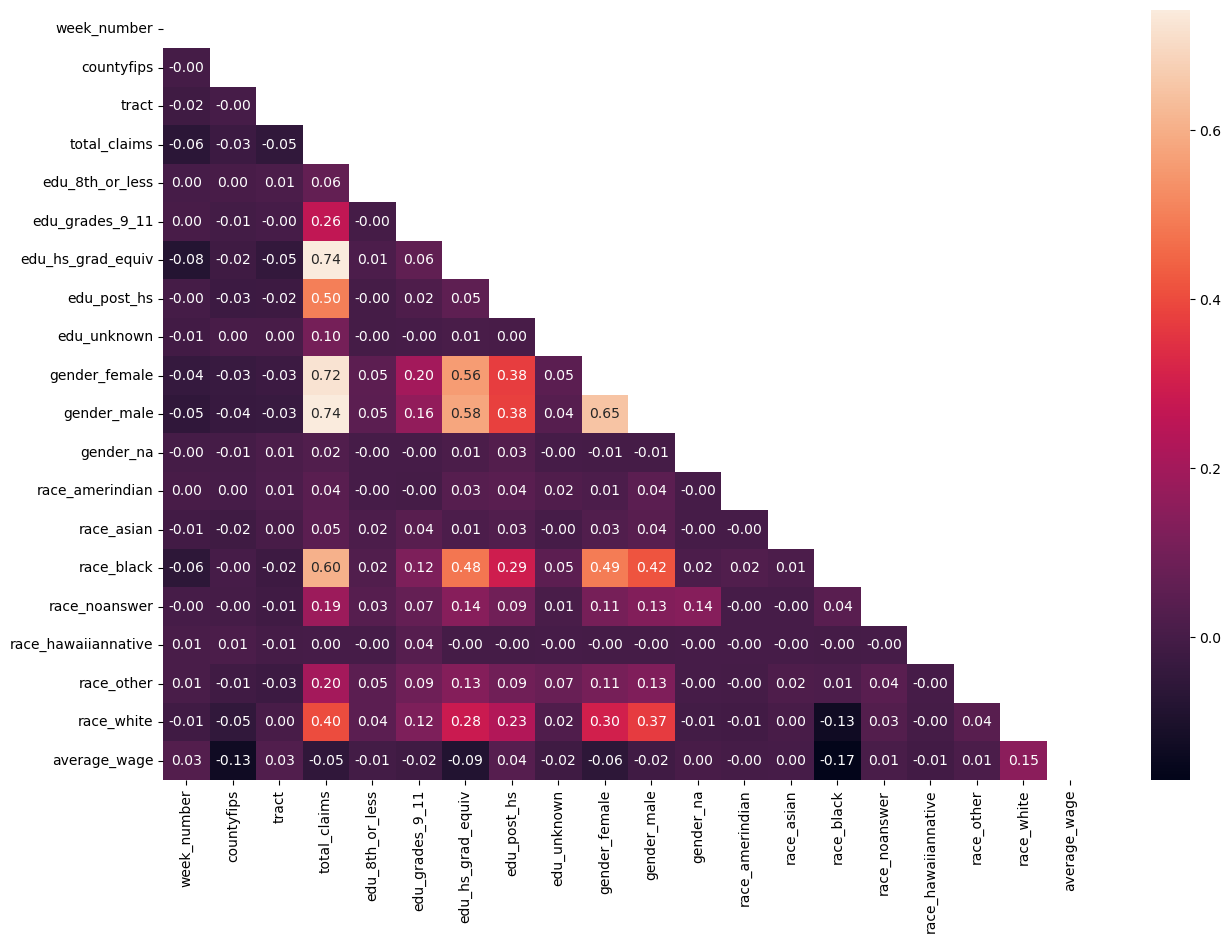

In [10]:
correlation = raw_df.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation, dtype=bool))
plt.figure(figsize=(15,10))
sns.heatmap(correlation, mask=mask, annot=True, fmt='.2f')

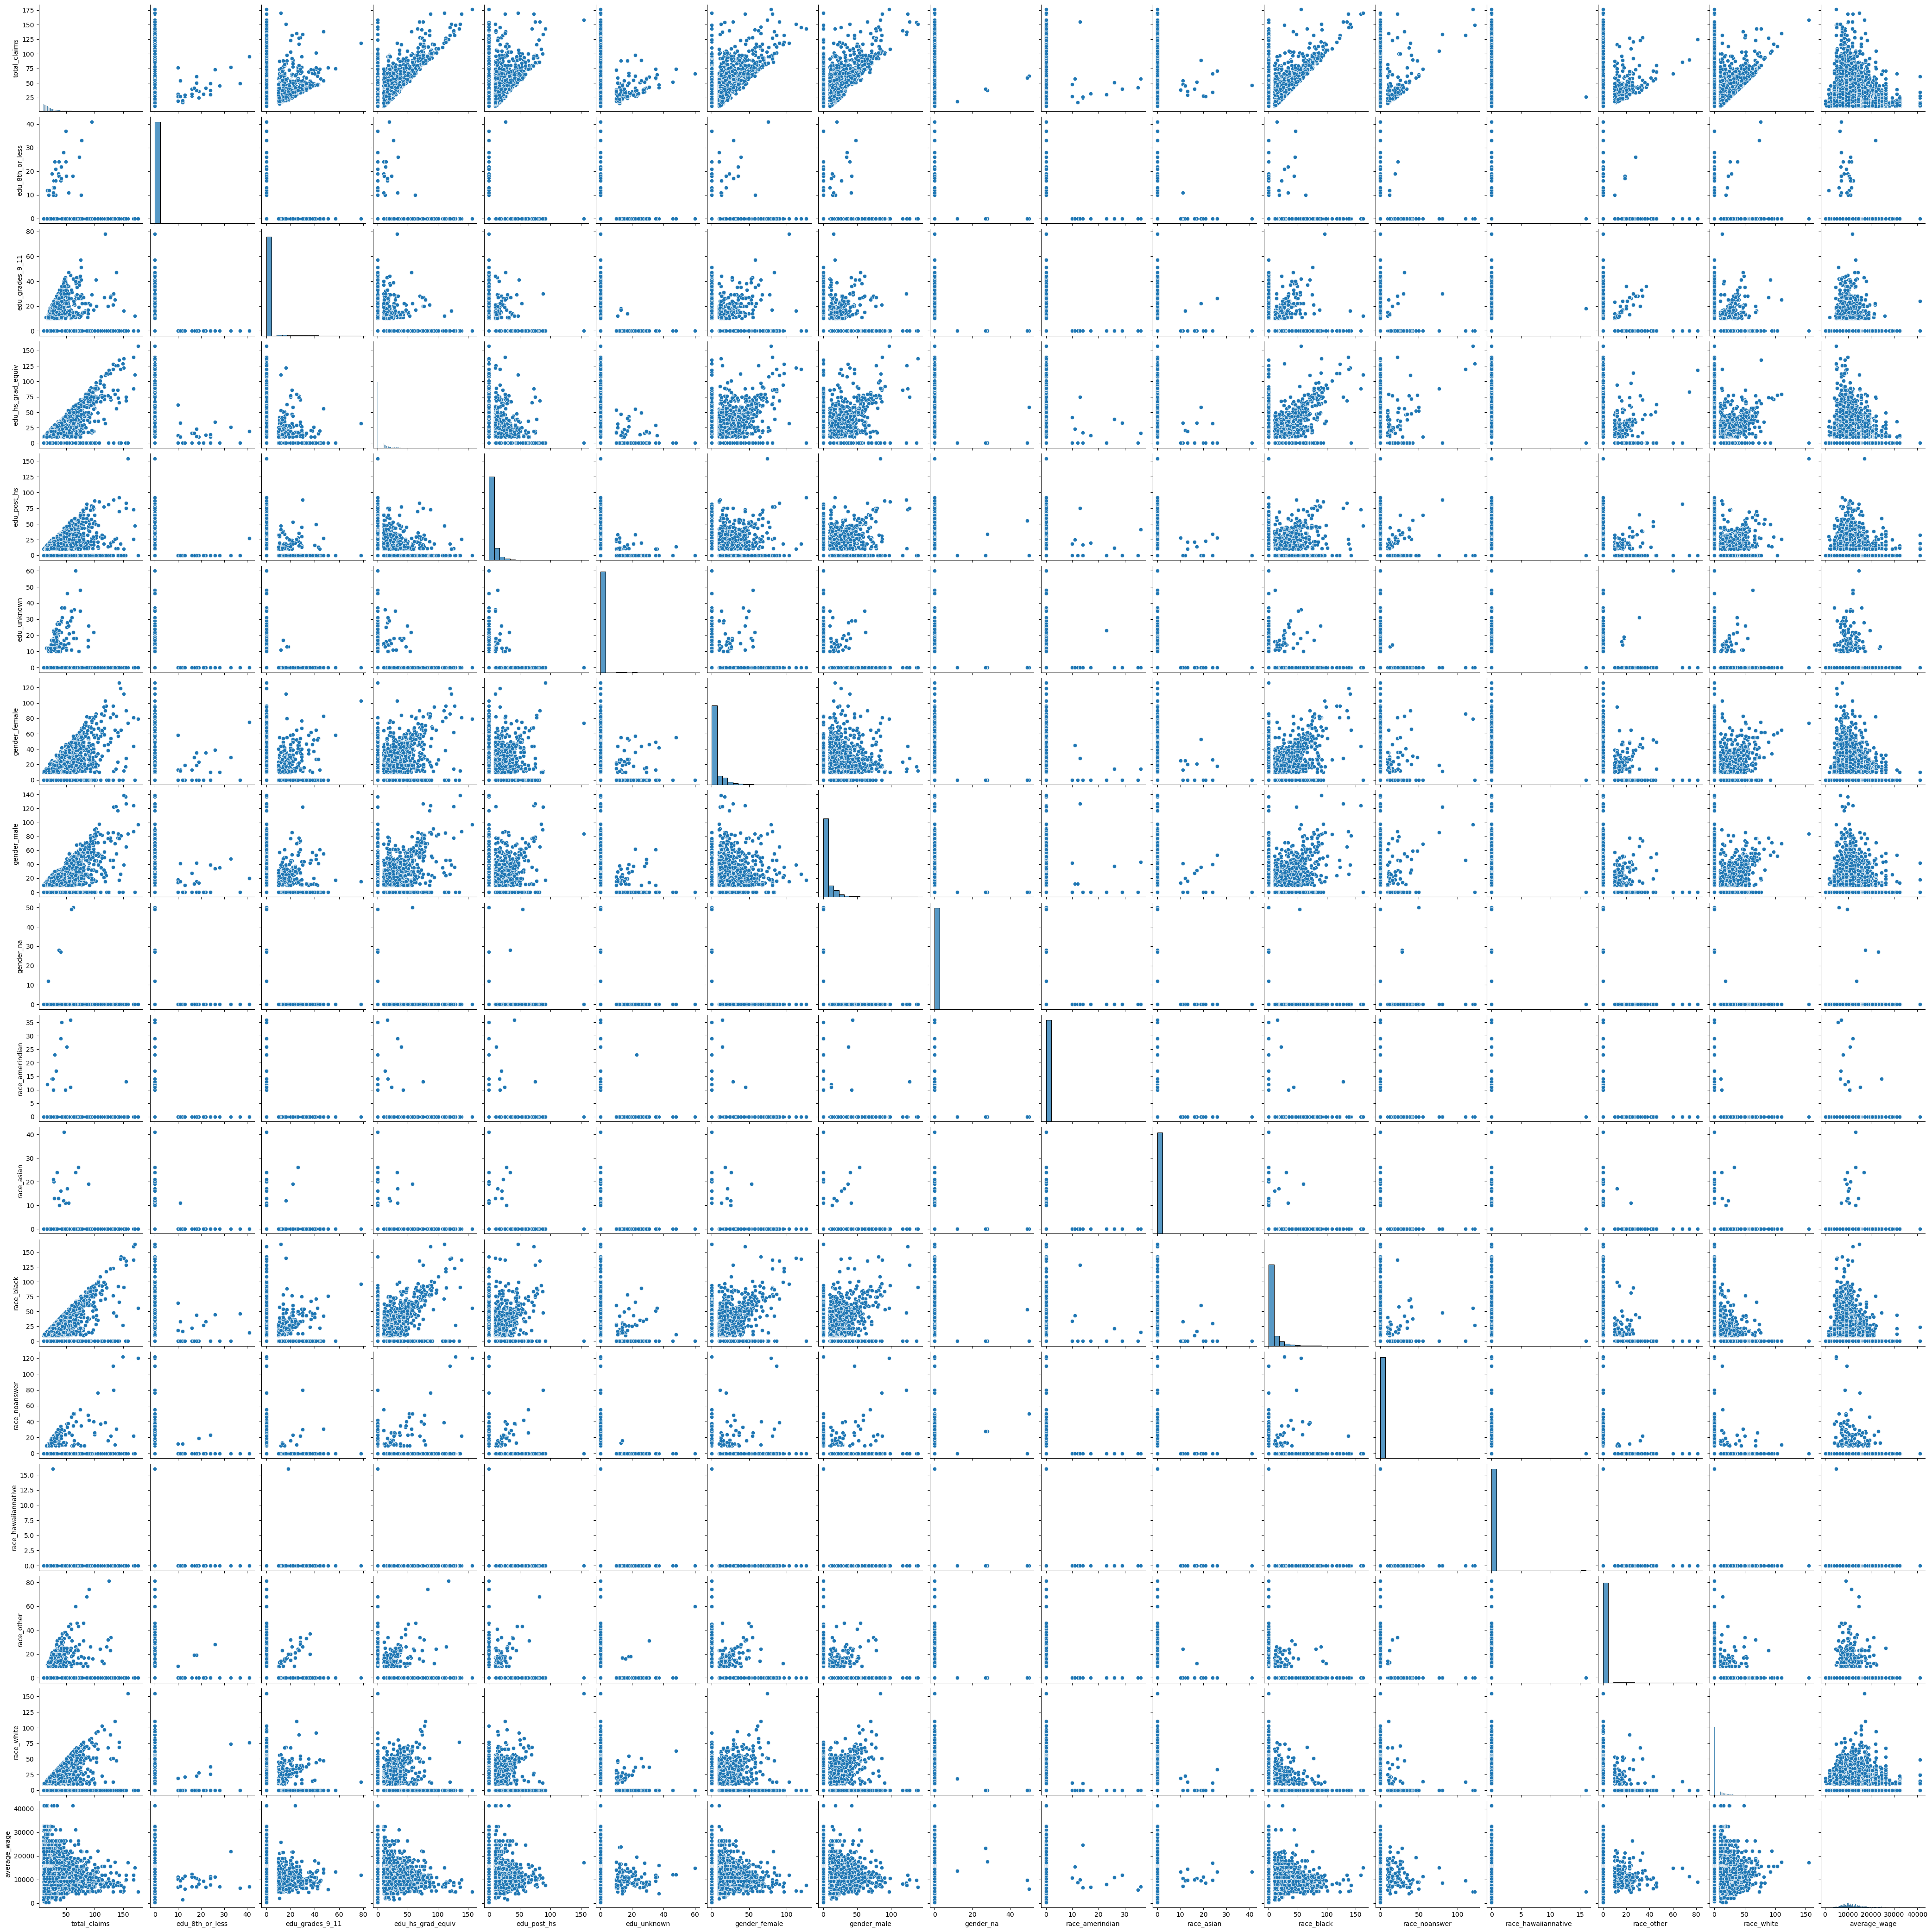

In [9]:
sns.pairplot(data=raw_df, vars= ['total_claims', 'edu_8th_or_less', 'edu_grades_9_11', 'edu_hs_grad_equiv', 'edu_post_hs', 'edu_unknown', 'gender_female', 'gender_male', 'gender_na', 'race_amerindian', 'race_asian', 'race_black', 'race_noanswer',
                                 'race_hawaiiannative', 'race_other', 'race_white', 'average_wage'])

#### Analysis:
There appears to be a linear relationship between total_claims (positive correlation) and a few other variables as seen in the correlation matrix. Distributions are non-uniform, and there are both inlier and outlier datapoints. 

Since this is survey data, answers with no response were logged as a 0 during aggregation, hence the flatlines.

In [11]:
timeline = raw_df[raw_df['tract_name'] == 'Census Tract 17, Tippecanoe County, Indiana']
timeline = timeline.groupby(['date', 'tract_name'], as_index= False,)['total_claims'].sum()

In [12]:
timeline

date                                   tract_name  total_claims
0  2022-01-01  Census Tract 17, Tippecanoe County, Indiana           130
1  2022-01-08  Census Tract 17, Tippecanoe County, Indiana           190
2  2022-01-15  Census Tract 17, Tippecanoe County, Indiana           140
3  2022-01-29  Census Tract 17, Tippecanoe County, Indiana           150
4  2022-02-05  Census Tract 17, Tippecanoe County, Indiana           240
5  2022-02-12  Census Tract 17, Tippecanoe County, Indiana           180
6  2022-02-19  Census Tract 17, Tippecanoe County, Indiana           405
7  2022-02-26  Census Tract 17, Tippecanoe County, Indiana           260
8  2022-03-05  Census Tract 17, Tippecanoe County, Indiana           135
9  2022-03-12  Census Tract 17, Tippecanoe County, Indiana           195
10 2022-03-19  Census Tract 17, Tippecanoe County, Indiana           325
11 2022-03-26  Census Tract 17, Tippecanoe County, Indiana           205
12 2022-04-02  Census Tract 17, Tippecanoe County, Indiana           385
13 2022-04-09  Census Tract 17, Tippecanoe County, Indiana           340
14 2022-04-16  Census Tract 17, Tippecanoe County, Indiana           265
15 2022-04-23  Census Tract 17, Tippecanoe County, Indiana            95
16 2022-04-30  Census Tract 17, Tippecanoe County, Indiana           165
17 2022-05-07  Census Tract 17, Tippecanoe County, Indiana           140
18 2022-05-14  Census Tract 17, Tippecanoe County, Indiana           345
19 2022-05-21  Census Tract 17, Tippecanoe County, Indiana           115
20 2022-05-28  Census Tract 17, Tippecanoe County, Indiana           115
21 2022-06-11  Census Tract 17, Tippecanoe County, Indiana           240
22 2022-06-18  Census Tract 17, Tippecanoe County, Indiana           190
23 2022-06-25  Census Tract 17, Tippecanoe County, Indiana            65
24 2022-07-02  Census Tract 17, Tippecanoe County, Indiana            80
25 2022-07-09  Census Tract 17, Tippecanoe County, Indiana           165
26 2022-07-16  Census Tract 17, Tippecanoe County, Indiana           160
27 2022-07-23  Census Tract 17, Tippecanoe County, Indiana            65
28 2022-07-30  Census Tract 17, Tippecanoe County, Indiana           105
29 2022-08-06  Census Tract 17, Tippecanoe County, Indiana           315
30 2022-08-13  Census Tract 17, Tippecanoe County, Indiana           330
31 2022-08-20  Census Tract 17, Tippecanoe County, Indiana           310
32 2022-08-27  Census Tract 17, Tippecanoe County, Indiana           210
33 2022-09-03  Census Tract 17, Tippecanoe County, Indiana           210
34 2022-09-10  Census Tract 17, Tippecanoe County, Indiana           180

<AxesSubplot:xlabel='date', ylabel='total_claims'>

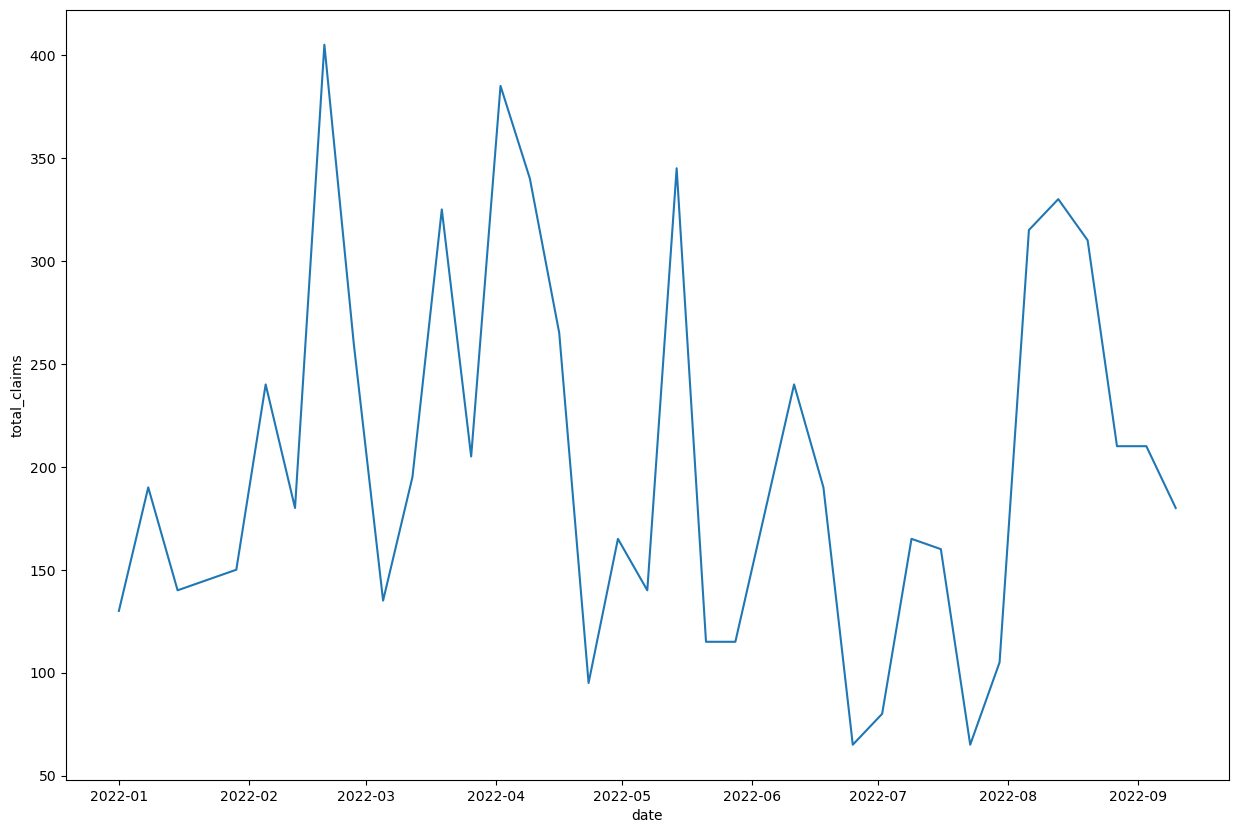

In [13]:
# view of Tippercanoe county
plt.figure(figsize=(15, 10))
sns.lineplot(data=timeline, x= 'date', y = 'total_claims')

In [14]:
# Tippercanoe county - average claims within this tract
timeline_by_week = raw_df[raw_df['tract_name'] == 'Census Tract 17, Tippecanoe County, Indiana']
timeline_by_week = timeline_by_week.groupby(['week_number', 'tract_name'], as_index=False)['total_claims'].mean()

In [15]:
timeline_by_week

week_number                                   tract_name  total_claims
0             1  Census Tract 17, Tippecanoe County, Indiana          26.0
1             2  Census Tract 17, Tippecanoe County, Indiana          38.0
2             3  Census Tract 17, Tippecanoe County, Indiana          28.0
3             5  Census Tract 17, Tippecanoe County, Indiana          30.0
4             6  Census Tract 17, Tippecanoe County, Indiana          48.0
5             7  Census Tract 17, Tippecanoe County, Indiana          36.0
6             8  Census Tract 17, Tippecanoe County, Indiana          81.0
7             9  Census Tract 17, Tippecanoe County, Indiana          52.0
8            10  Census Tract 17, Tippecanoe County, Indiana          27.0
9            11  Census Tract 17, Tippecanoe County, Indiana          39.0
10           12  Census Tract 17, Tippecanoe County, Indiana          65.0
11           13  Census Tract 17, Tippecanoe County, Indiana          41.0
12           14  Census Tract 17, Tippecanoe County, Indiana          77.0
13           15  Census Tract 17, Tippecanoe County, Indiana          68.0
14           16  Census Tract 17, Tippecanoe County, Indiana          53.0
15           17  Census Tract 17, Tippecanoe County, Indiana          19.0
16           18  Census Tract 17, Tippecanoe County, Indiana          33.0
17           19  Census Tract 17, Tippecanoe County, Indiana          28.0
18           20  Census Tract 17, Tippecanoe County, Indiana          69.0
19           21  Census Tract 17, Tippecanoe County, Indiana          23.0
20           22  Census Tract 17, Tippecanoe County, Indiana          23.0
21           24  Census Tract 17, Tippecanoe County, Indiana          48.0
22           25  Census Tract 17, Tippecanoe County, Indiana          38.0
23           26  Census Tract 17, Tippecanoe County, Indiana          13.0
24           27  Census Tract 17, Tippecanoe County, Indiana          16.0
25           28  Census Tract 17, Tippecanoe County, Indiana          33.0
26           29  Census Tract 17, Tippecanoe County, Indiana          32.0
27           30  Census Tract 17, Tippecanoe County, Indiana          13.0
28           31  Census Tract 17, Tippecanoe County, Indiana          21.0
29           32  Census Tract 17, Tippecanoe County, Indiana          21.0
30           33  Census Tract 17, Tippecanoe County, Indiana          33.0
31           34  Census Tract 17, Tippecanoe County, Indiana          31.0
32           35  Census Tract 17, Tippecanoe County, Indiana          21.0
33           36  Census Tract 17, Tippecanoe County, Indiana          21.0
34           37  Census Tract 17, Tippecanoe County, Indiana          18.0

<AxesSubplot:xlabel='week_number', ylabel='total_claims'>

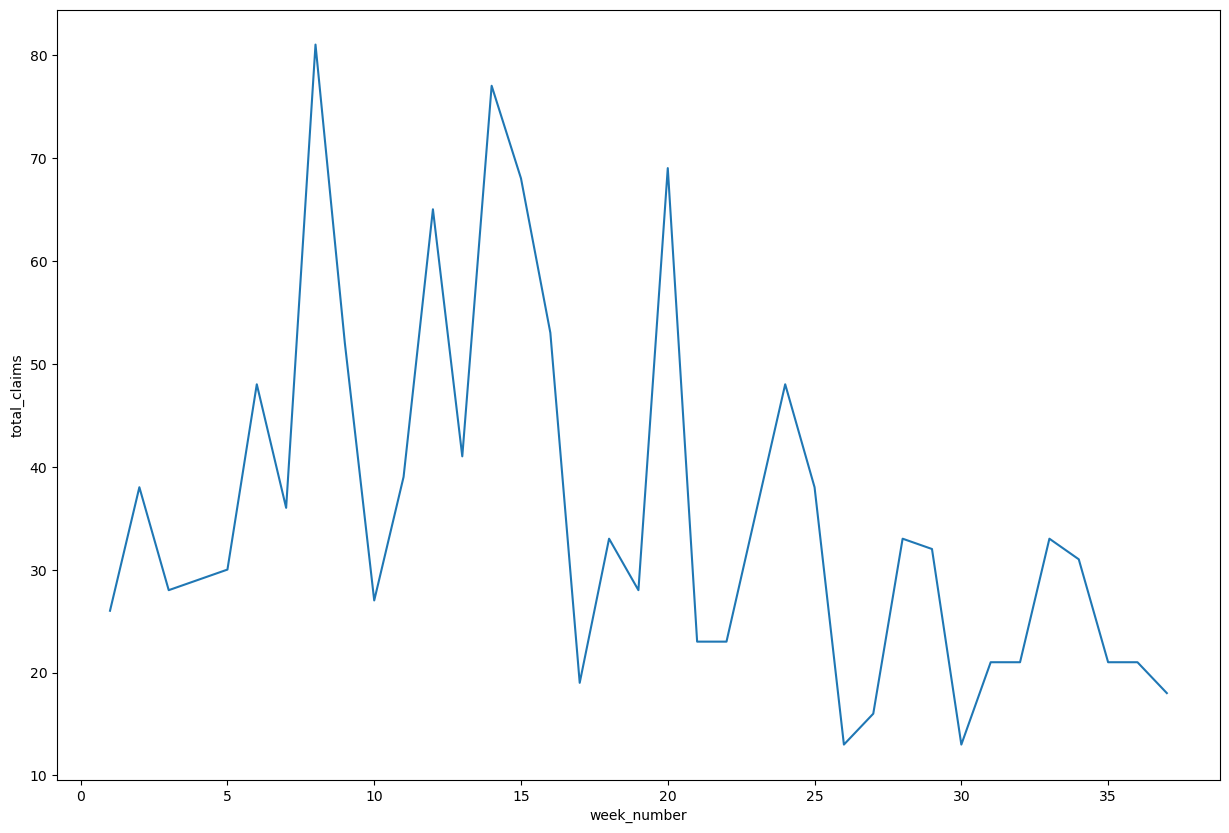

In [16]:
plt.figure(figsize=(15,10))
sns.lineplot(data=timeline_by_week, x='week_number', y='total_claims')

## ML stuff

In [17]:
prediction_list = pd.read_csv('C:\\Users\\ldmag\\Documents\\GitHub\\Code-Assignments-Projects\\Projects\\Ironhacks_Unemployment\\data\\prediction_list.csv', index_col=0)

In [18]:
def evaluate_regressor(prediction_dataframe):
    # Takes in a prediction dataframe of 2 columns, Actual values and Predicted values generated by a regressor
    # Outputs MSE, MAR, RMSE and MAPE metrics. Must have columns named Actual and Predicted.
    print('MSE:', mean_squared_error(prediction_dataframe['Actual'], prediction_dataframe['Predicted']))
    print('MAE:', mean_absolute_error(prediction_dataframe['Actual'], prediction_dataframe['Predicted']))
    print('RMSE:', np.sqrt(mean_squared_error(prediction_dataframe['Actual'], prediction_dataframe['Predicted'])))
    print('MAPE:', np.mean(np.abs((prediction_dataframe['Actual'] - prediction_dataframe['Predicted']) / prediction_dataframe['Actual'])) * 100)

In [53]:
def get_predictions(regressor, model_type, name, week, month, day):
    # generates predictions for any model and writes out a dataframe in csv containing them
    # takes a regressor and learning method type as input: DL and ML
    # DL/ML variable basically changes the shape for an input from a 2D array to 3D arry, as required tensor shape
    # NOTE: When calling function, make sure to enter a viable month and day
    result_list = []
    uu_id_transform = LE.fit_transform(prediction_list['uu_id'])
    if model_type == 'DL':
        predict_arr = np.array(SC_other.transform([[0, 1, 6, 4, 4, 5, 0, 1, 2, 0, 0, 4, 1, 4200.0]]))
        for val in uu_id_transform:
            to_predict = np.insert(predict_arr, 0, val, axis=1)
            to_predict = np.insert(to_predict, 1, week, axis=1)
            to_predict = np.insert(to_predict, 14, month, axis=1)
            to_predict = np.insert(to_predict, 15, day, axis=1)
            to_predict = np.reshape(to_predict, (to_predict.shape[0], to_predict.shape[1],1))
            r = regressor.predict(to_predict)
            result_list.append(r)
        result_list = np.array(result_list)
        result_list = np.reshape(result_list, (525,))
    elif model_type == 'ML':
        predict_arr = np.array(RB_other.transform([[0, 1, 6, 4, 4, 5, 0, 1, 2, 0, 0, 4, 1, 4200.0]]))
        for val in uu_id_transform:
            to_predict = np.insert(predict_arr, 0, val, axis=1)
            to_predict = np.insert(to_predict, 1, week, axis=1)
            to_predict = np.insert(to_predict, 14, month, axis=1)
            to_predict = np.insert(to_predict, 15, day, axis=1)
            r = regressor.predict(to_predict)
            result_list.append(r)
    result_df = pd.DataFrame(result_list, columns = ['Predictions'])
    prediction_sub = prediction_list.copy()
    prediction_sub['total_claims'] = result_df.values
    prediction_sub = prediction_sub[['uu_id','total_claims','week_number']]
    #os.makedirs('lost+found/submission_files', exist_ok=True)
    #prediction_sub.to_csv(name+'.csv', index=False)
    return prediction_sub

In [21]:
def get_pred_frame(test_frame, prediction_array):
    prediction_frame = pd.DataFrame({'Actual': test_frame, 'Predicted': prediction_array.flatten()})
    return prediction_frame

In [22]:
def IsoForest_anomaly(data):
    IFO = IsolationForest(random_state=69)
    col_list = ['week_number', 'total_claims', 'edu_8th_or_less',
                'edu_grades_9_11', 'edu_hs_grad_equiv', 'edu_post_hs', 'gender_female',
                'gender_male', 'race_amerindian', 'race_asian', 'race_black',
                'race_hawaiiannative', 'race_other', 'race_white', 'race_noanswer', 'average_wage']
    NO_df = data.copy()
    IFO.fit(data)
    NO_df['anomaly_scores'] = IFO.decision_function(data)
    NO_df['anomaly'] = IFO.predict(data)
    no_outlier = NO_df[NO_df['anomaly'] == 1]
    print('Removed ', NO_df[NO_df['anomaly'] == -1].shape[0], 'datapoints')
    palette = ['#ff7f0e','#1f77b4']
    sns.pairplot(NO_df, vars = col_list, hue='anomaly', palette=palette)
    no_outlier.drop(['anomaly_scores','anomaly'], axis = 1, inplace=True)
    return no_outlier

In [23]:
def preprocess(data, scaling):
    no_outlierDF = data.copy()
    to_drop = ['tract','top_category_employer1','top_category_employer2',
           'top_category_employer3','countyfips', 'edu_unknown', 'gender_na', 'date', 'tract_name']
    to_scale = ['edu_8th_or_less', 'edu_grades_9_11', 'edu_hs_grad_equiv', 'edu_post_hs', 
            'gender_female', 'gender_male', 'race_amerindian', 'race_asian', 'race_black', 
            'race_hawaiiannative', 'race_other', 'race_white', 'race_noanswer', 'average_wage']
    no_outlierDF['month'] = no_outlierDF['date'].dt.month
    no_outlierDF['day'] = no_outlierDF['date'].dt.day
    no_outlierDF.drop(to_drop, axis=1, inplace=True)
    no_outlierDF['uu_id'] = LE.fit_transform(no_outlierDF['uu_id'])
    if scaling == 'Robust':
        no_outlierDF[to_scale] = RB_other.fit_transform(no_outlierDF[to_scale])
    elif scaling == 'Standard':
        no_outlierDF[to_scale] = SC_other.fit_transform(no_outlierDF[to_scale])
    return no_outlierDF

In [24]:
LE = LabelEncoder()
RB_other = RobustScaler()
SC_other = StandardScaler()

In [25]:
clean_df = raw_df.copy()

In [26]:
ML_data = preprocess(clean_df, 'Robust')

In [27]:
ML_data.head(5)

uu_id  week_number  total_claims  edu_8th_or_less  edu_grades_9_11  \
0    762           17            12              0.0              0.0   
1    762           10            14              0.0              0.0   
2    762            8            20              0.0              0.0   
3    762           27            12              0.0              0.0   
4    762           12            10              0.0              0.0   

   edu_hs_grad_equiv  edu_post_hs  gender_female  gender_male  \
0           0.000000          0.0            0.0          0.0   
1           0.000000          0.0            0.0          0.0   
2           1.166667          0.0            0.0          0.0   
3           0.000000          0.0            0.0          0.0   
4           0.000000          0.0            0.0          0.0   

   race_amerindian  race_asian  race_black  race_noanswer  \
0              0.0         0.0         0.0            0.0   
1              0.0         0.0         0.0            0.0   
2              0.0         0.0         0.0            0.0   
3              0.0         0.0         0.0            0.0   
4              0.0         0.0         0.0            0.0   

   race_hawaiiannative  race_other  race_white  average_wage  month  day  
0                  0.0         0.0         0.0     -0.480855      4   23  
1                  0.0         0.0         0.0     -0.480855      3    5  
2                  0.0        12.0         0.0     -0.480855      2   19  
3                  0.0         0.0         0.0     -0.480855      7    2  
4                  0.0         0.0         0.0     -0.480855      3   19

Removed  9684 datapoints


C:\Users\ldmag\AppData\Local\Temp\ipykernel_29632\2825902704.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_outlier.drop(['anomaly_scores','anomaly'], axis = 1, inplace=True)


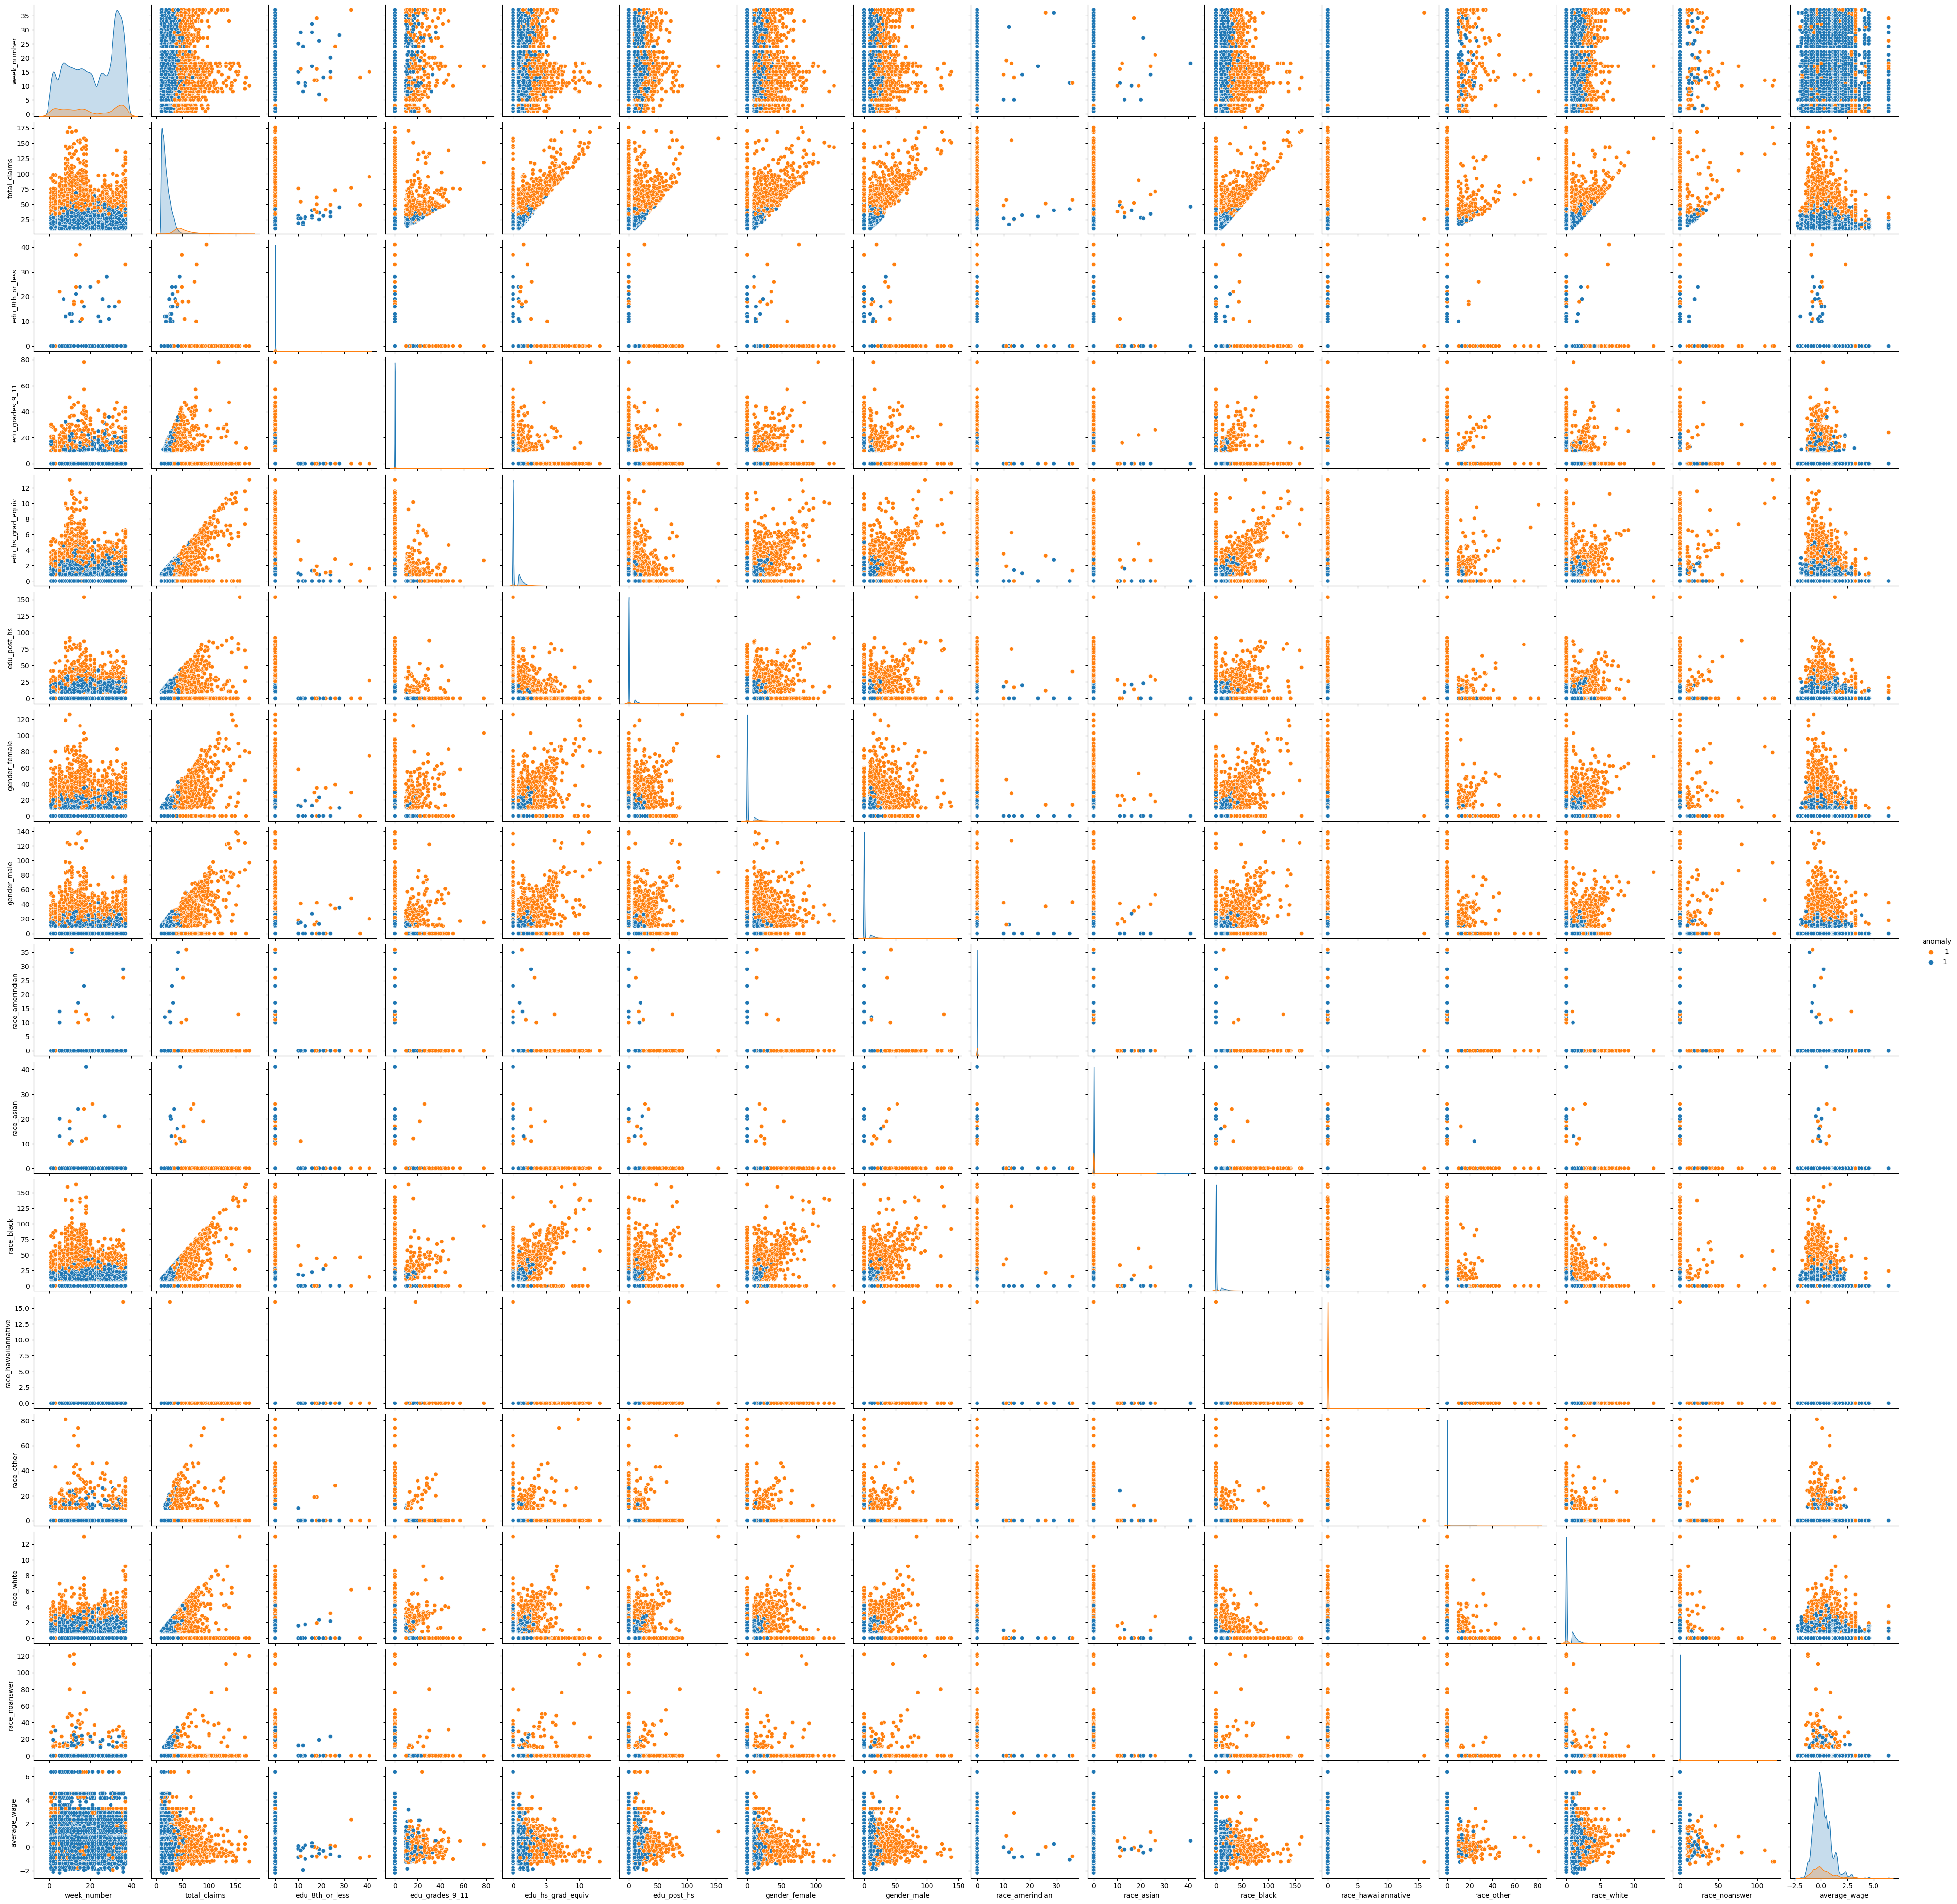

In [28]:
ingest_clean = IsoForest_anomaly(ML_data)

In [29]:
ingest_clean.head(5)

uu_id  week_number  total_claims  edu_8th_or_less  edu_grades_9_11  \
0    762           17            12              0.0              0.0   
1    762           10            14              0.0              0.0   
2    762            8            20              0.0              0.0   
3    762           27            12              0.0              0.0   
4    762           12            10              0.0              0.0   

   edu_hs_grad_equiv  edu_post_hs  gender_female  gender_male  \
0           0.000000          0.0            0.0          0.0   
1           0.000000          0.0            0.0          0.0   
2           1.166667          0.0            0.0          0.0   
3           0.000000          0.0            0.0          0.0   
4           0.000000          0.0            0.0          0.0   

   race_amerindian  race_asian  race_black  race_noanswer  \
0              0.0         0.0         0.0            0.0   
1              0.0         0.0         0.0            0.0   
2              0.0         0.0         0.0            0.0   
3              0.0         0.0         0.0            0.0   
4              0.0         0.0         0.0            0.0   

   race_hawaiiannative  race_other  race_white  average_wage  month  day  
0                  0.0         0.0         0.0     -0.480855      4   23  
1                  0.0         0.0         0.0     -0.480855      3    5  
2                  0.0        12.0         0.0     -0.480855      2   19  
3                  0.0         0.0         0.0     -0.480855      7    2  
4                  0.0         0.0         0.0     -0.480855      3   19

In [30]:
Y = ingest_clean['total_claims']
X = ingest_clean[['uu_id', 'week_number', 'edu_8th_or_less',
                 'edu_grades_9_11', 'edu_hs_grad_equiv', 'edu_post_hs', 'gender_female',
                 'gender_male', 'race_amerindian', 'race_asian', 'race_black', 'race_noanswer',
                 'race_hawaiiannative', 'race_other', 'race_white', 'average_wage', 'month', 'day']]

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.20, random_state=69)

### Random Forest with Exhaustive Grid Search

In [98]:
'''
%%capture
Regressor_RF = RandomForestRegressor(random_state=69)
search_space = dict()
search_space['n_estimators'] = np.arange(400,700,100)
search_space['criterion'] = ['squared_error','absolute_error']
search_space['max_features'] = ['sqrt',1.0]
GS = GridSearchCV(estimator=Regressor_RF, param_grid=search_space, cv=3, n_jobs=-1, return_train_score=True)

result = GS.fit(X_train,Y_train)
'''

In [89]:
Regressor_RF_bestFit = RandomForestRegressor(random_state=69, criterion='squared_error', max_features=1.0, n_estimators= 600)
Regressor_RF_bestFit.fit(X_train.values, Y_train.values)

RandomForestRegressor(n_estimators=600, random_state=69)

In [90]:
Y_pred_RFR = Regressor_RF_bestFit.predict(X_test.values).reshape(-1,1)
get_pred_frame(Y_test, Y_pred_RFR)

Actual  Predicted
50701      17  16.855000
45316      15  14.976667
17521      31  32.026667
40965      19  18.986667
5006       14  13.945000
...       ...        ...
2926       11  11.658333
54137      20  19.903333
33945      30  29.461667
36935      14  14.013333
23153      12  12.108333

[15288 rows x 2 columns]

In [91]:
evaluate_regressor(get_pred_frame(Y_test, Y_pred_RFR))

MSE: 0.9196587386984708
MAE: 0.30304890545961977
RMSE: 0.9589883934117611
MAPE: 1.9007972708888186


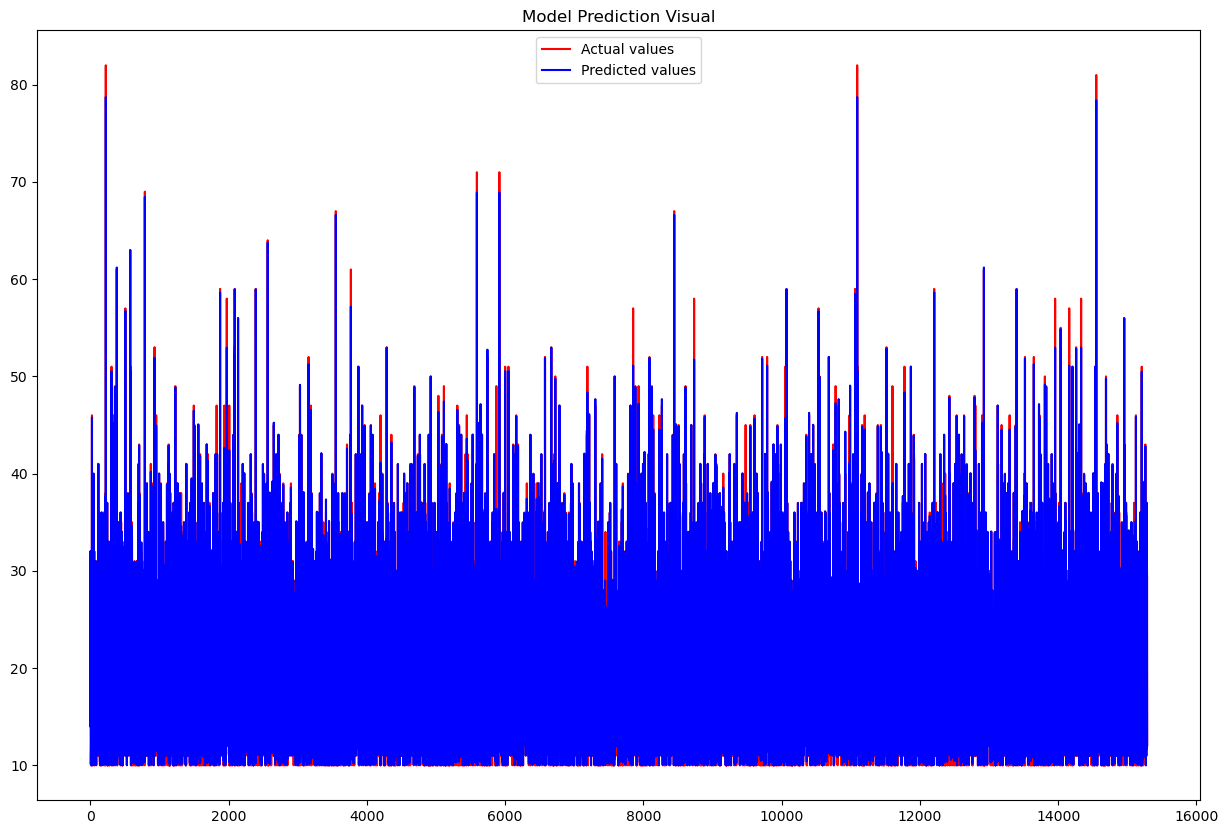

In [92]:
plt.figure(figsize=(15,10))
plt.plot(Y_test.values, color = 'red', label = 'Actual values')
plt.plot(Y_pred_RFR, color='blue', label='Predicted values')
plt.title('Model Prediction Visual')
plt.legend()
plt.show()

In [80]:
get_predictions(Regressor_RF_bestFit, 'ML', 'submission_prediction_output_RFR', 44, 11, 5)

d:\Anaconda\envs\MDL\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


uu_id  total_claims  week_number
0    5bf51fc2e162d6faf9e3cf79e4198378     50.744444           44
1    420b44cc7e3f55d738df565421e59941     50.744444           44
2    e39c66ecceec76ee8f9f811fa4a2d246     50.924074           44
3    a90462cd11ae4e43144239bf7c4828a4     50.738889           44
4    8b20a6749088c7ff1237983076ebfeaa     50.738889           44
..                                ...           ...          ...
520  46c4f6c75e663b1ca82ea7994e6d83d3     50.744444           44
521  1deebda501712e7595b531b8337bc31a     50.744444           44
522  5a9758f65f001b6432ff31ff64a459d7     50.744444           44
523  e8b3b95e93a6dc7dbb90f4e72e7ac065     50.924074           44
524  932a58530abff8a48558e2a15639d453     50.738889           44

[525 rows x 3 columns]

In [73]:
result = get_predictions(Regressor_RF_bestFit, 'ML', 'submission_prediction_output_RFR', 39, 10, 1)

d:\Anaconda\envs\MDL\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


Note: It appears increasing granularity also increases prediction numbers for each id. I'm not sure why this is happening.

In [75]:
result['total_claims'].unique()

array([50.79833333, 50.97166667, 50.79333333, 50.855     , 50.845     ,
       50.925     , 50.88166667, 50.995     , 50.73      ])